In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import scipy.misc

plt.style.use('ggplot')

%matplotlib inline

# Проблемы полносвязных сетей

* Большое количество степеней свободы
* Неустойчивы к небольшим смещениям
* Фиксированный размер входного тензора

# Операция свёртки

Операция свёртки определена как

$$ (f \ast g)(x) \triangleq \int_{R^d} f(y)g(x-y)dy $$

где f - это оригинал, а g - ядро свёртки

Можно сказать, что ядро "присваивает" вес каждому значению функции

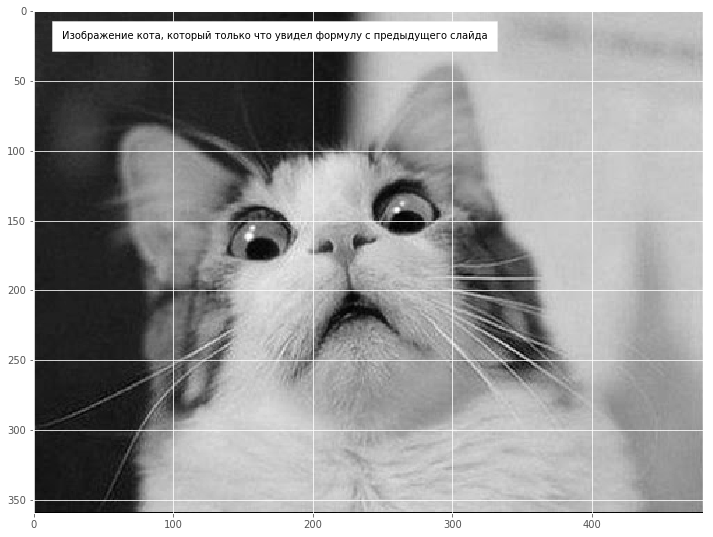

In [208]:
fig, ax = plt.subplots(figsize=(12, 12))
image =  scipy.misc.imread('img/cat.jpg', mode='L')
image = image.astype(np.float) / 255 # Грабли
ax.text(20, 20, 'Изображение кота, который только что увидел формулу с предыдущего слайда', bbox={'facecolor': 'white', 'pad': 10})
ax.imshow(image, cmap='gray')

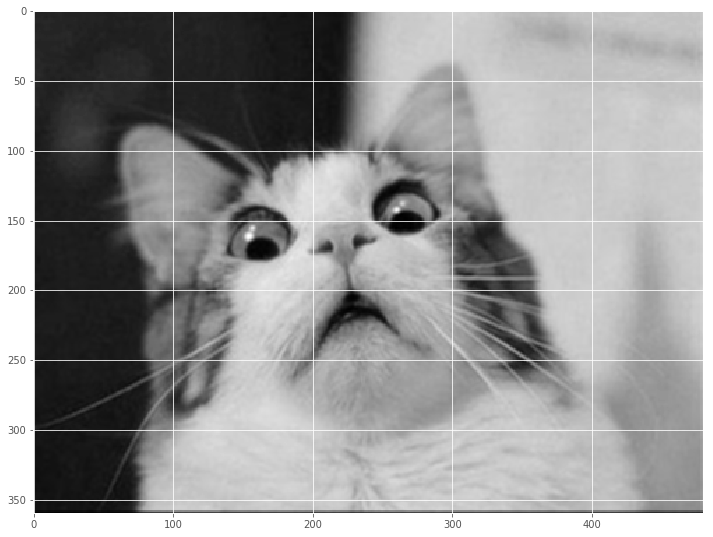

In [222]:
from scipy.ndimage import convolve

kernel = np.array([[ 1/9,  1/9,  1/9],
                   [ 1/9,  1/9,  1/9],
                   [ 1/9,  1/9,  1/9]])

result = np.clip(convolve(image, kernel), 0, 1)
fig, ax = plt.subplots(figsize=(12, 12))
ax.imshow(result, cmap='gray');

# Сглаживание кота

<img src="img/purr.jpg"></img>

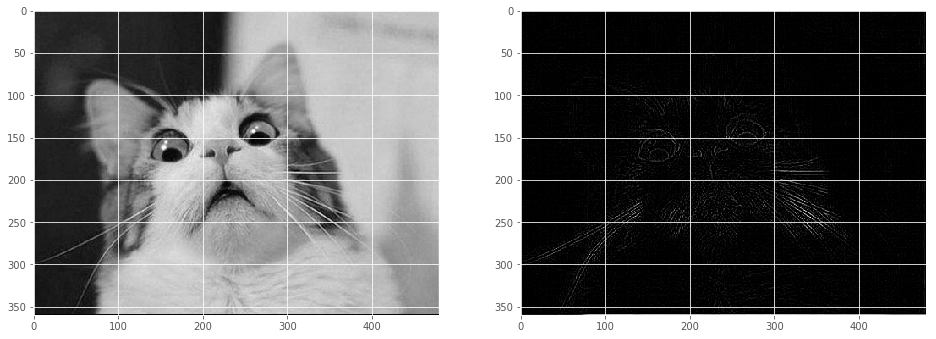

In [240]:
# Нахождение границ (edge detector)
kernel = np.array([[ 0,  1, 0 ],
                   [ 1, -4, 1 ],
                   [ 0,  1, 0 ]])

result = np.clip(convolve(image, kernel), 0, 1)
fig, ax = plt.subplots(1, 2, figsize=(16, 16))
ax[0].imshow(image, cmap='gray')
ax[1].imshow(result, cmap='gray');

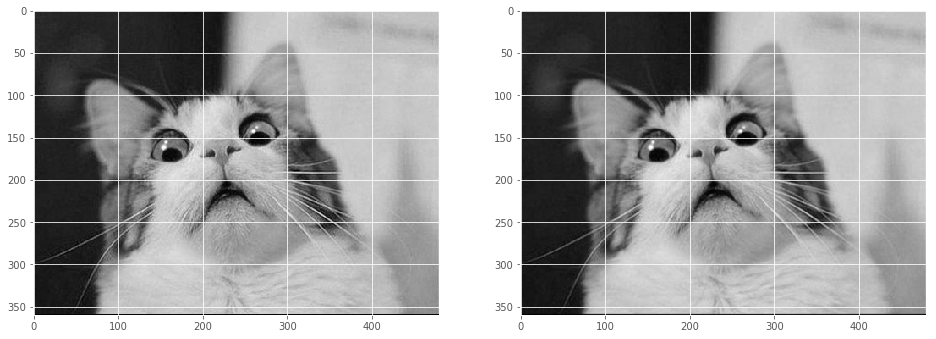

In [232]:
# Гауссовское сглаживание (gaussian blur)
kernel = np.array([[  0,  1/9,   0  ],
                   [ 1/9, 5/9,  1/9 ],
                   [  0,  1/9,   0  ]])

result = np.clip(convolve(image, kernel), 0, 1)
fig, ax = plt.subplots(1, 2, figsize=(16, 16))
ax[0].imshow(image, cmap='gray')
ax[1].imshow(result, cmap='gray');

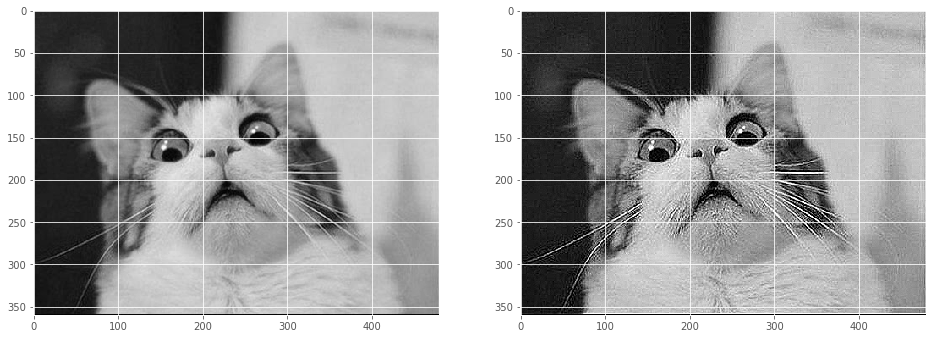

In [228]:
# Увеличение чёткости
kernel = np.array([[  0, -1,  0 ],
                   [ -1,  5, -1 ],
                   [  0, -1,  0 ]])

result = np.clip(convolve(image, kernel), 0, 1)
fig, ax = plt.subplots(1, 2, figsize=(16, 16))
ax[0].imshow(image, cmap='gray')
ax[1].imshow(result, cmap='gray');

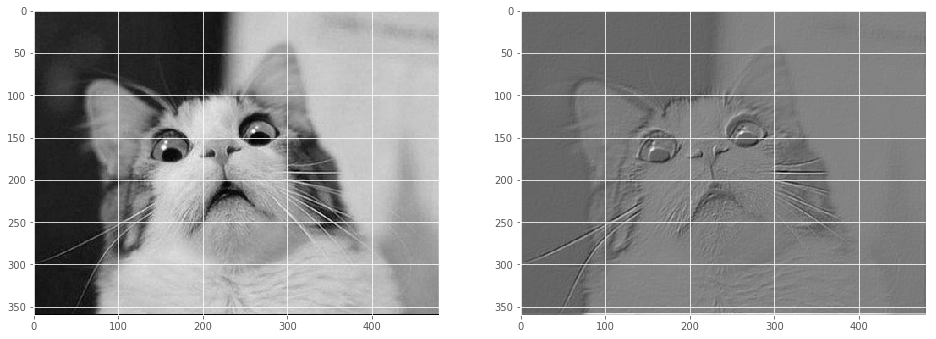

In [205]:
 kernel = np.array([[ -2, -1,  0 ],
                    [ -1,  1,  1 ],
                    [  0,  1,  2 ]])

result = convolve(image/255, kernel)
fig, ax = plt.subplots(1, 2, figsize=(16, 16))
ax[0].imshow(image, cmap='gray')
ax[1].imshow(result, cmap='gray');

# Разные виды конволюции

<table style="width:100%; font-weight:bold">
  <tr>
    <td><img src="gif/no_padding_no_strides.gif"></td>
    <td><img src="gif/arbitrary_padding_no_strides.gif"></td>
    <td><img src="gif/same_padding_no_strides.gif"></td>
    <td><img src="gif/full_padding_no_strides.gif"></td>
  </tr>
  <tr>
    <td>No padding, no strides</td>
    <td>Arbitrary padding, no strides</td>
    <td>Half padding, no strides</td>
    <td>Full padding, no strides</td>
  </tr>
  <tr>
    <td><img src="gif/no_padding_no_strides_transposed.gif"></td>
    <td><img src="gif/arbitrary_padding_no_strides_transposed.gif"></td>
    <td><img src="gif/same_padding_no_strides_transposed.gif"></td>
    <td><img src="gif/full_padding_no_strides_transposed.gif"></td>
  </tr>
  <tr>
    <td>No padding, no strides, transposed</td>
    <td>Arbitrary padding, no strides, transposed</td>
    <td>Half padding, no strides, transposed</td>
    <td>Full padding, no strides, transposed</td>
  </tr>
  <tr>
    <td><img src="gif/no_padding_strides.gif"></td>
    <td><img src="gif/padding_strides.gif"></td>
    <td><img src="gif/padding_strides_odd.gif"></td>
    <td></td>
  </tr>
  <tr>
    <td>No padding, strides</td>
    <td>Padding, strides</td>
    <td>Padding, strides (odd)</td>
    <td></td>
  </tr>
</table>

# Max pooling

<img src="img/maxpool.jpeg"/>



# Типичная архитектура сети

<img src="img/cnn_arch.png"/>

# Визуализация

Есть несколько способов понять что же на самом деле выучила сеть:

* Визуализация фильтров
* Нахождение изображений максимизирующих класс
* Карты активации
* Генерация изображения максимизирующего выход детектора

In [96]:
import keras
import keras.applications
import tensorflow as tf

session = tf.InteractiveSession()
model = keras.applications.VGG16(include_top=True, weights='imagenet')

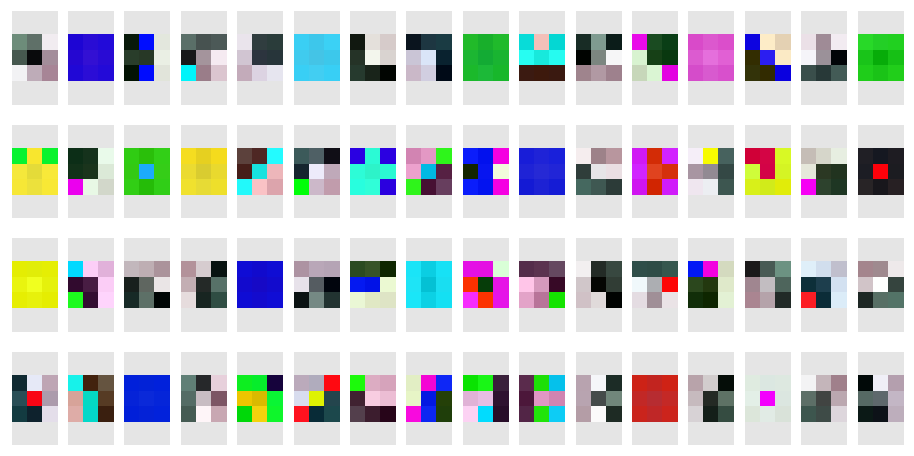

In [105]:
import keras
import keras.applications
import tensorflow as tf

first_conv_layer = model.layers[1]
kernels = first_conv_layer.weights[0]
w = kernels.value().eval(session=session)

fig, axes = plt.subplots(4, 16, sharex=True, sharey=True, figsize=(16, 8))

for i, row in enumerate(axes):
    for j, ax in enumerate(row):
        kernel_index = i * 16 + j
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        ax.imshow(w[:, :, :, kernel_index])

In [98]:
w.shape

(3, 3, 3, 64)